In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	148
float64		column 2	185
float64		column 3	222
float64		column 4	222
float64		column 5	148
float64		column 6	0
float64		column 7	185
float64		column 8	74


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1336.000000,1299.000000,1262.000000,1262.000000,1336.000000,1484.000000,1299.000000,1410.000000
mean,0.499611,0.498861,0.501727,0.260610,0.504865,0.007500,0.500015,0.275965
std,0.134853,0.122290,0.081727,0.137565,0.049100,0.075683,0.056017,0.106156
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.572500,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,0.970000,1.000000,0.790000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

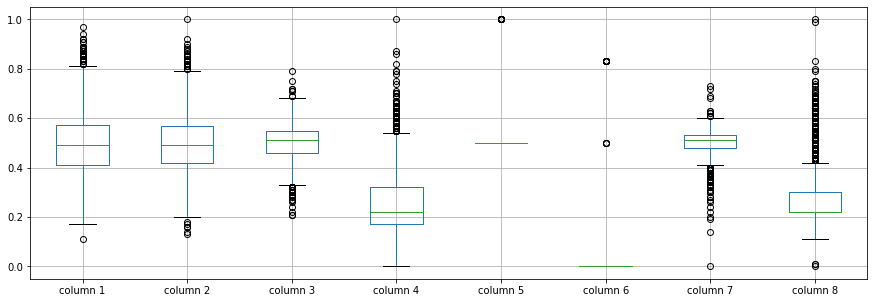

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499611
column 2    0.498861
column 3    0.501727
column 4    0.260610
column 5    0.504865
column 6    0.007500
column 7    0.500015
column 8    0.275965
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.559298,-0.143540,0.158135,0.078258,0.018921,0.069281,-0.126418
column 2,0.559298,1.000000,-0.251406,0.156411,0.090273,-0.007854,0.064980,-0.097858
column 3,-0.143540,-0.251406,1.000000,0.035906,-0.038288,0.001679,-0.167574,0.004510
column 4,0.158135,0.156411,0.035906,1.000000,-0.011412,-0.028550,-0.060496,-0.031258
column 5,0.078258,0.090273,-0.038288,-0.011412,1.000000,-0.008813,0.048115,0.012008
column 6,0.018921,-0.007854,0.001679,-0.028550,-0.008813,1.000000,0.011032,-0.036483
column 7,0.069281,0.064980,-0.167574,-0.060496,0.048115,0.011032,1.000000,0.065018
column 8,-0.126418,-0.097858,0.004510,-0.031258,0.012008,-0.036483,0.065018,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+36,8+36+36,8+36+36+36,8+36+36+36+36,8+36+36+36+36+36,8+36+36+36+36+36+36,8+36+36+36+36+36,8+36+36+36+36,8+36+36+36,8+36+36,8+36,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.6173703540926394
Epoch: 1 , loss: 2.205919115439705
Epoch: 2 , loss: 2.032276761272679
Epoch: 3 , loss: 1.891281897607057
Epoch: 4 , loss: 1.7864776266657787
Epoch: 5 , loss: 1.7002416499283002
Epoch: 6 , loss: 1.6252316767754762
Epoch: 7 , loss: 1.5557785293330317
Epoch: 8 , loss: 1.4819865278575732
Epoch: 9 , loss: 1.434421356605447
Epoch: 10 , loss: 1.3881177876306616
Epoch: 11 , loss: 1.3316123057966647
Epoch: 12 , loss: 1.3034803718328476
Epoch: 13 , loss: 1.2638396847507227
Epoch: 14 , loss: 1.250560392504153
Epoch: 15 , loss: 1.2158295227133709
Epoch: 16 , loss: 1.1755172649155492
Epoch: 17 , loss: 1.1695902308692103
Epoch: 18 , loss: 1.1352925851293232
Epoch: 19 , loss: 1.130623792824538
Epoch: 20 , loss: 1.1328811373399652
Epoch: 21 , loss: 1.0923539555591086
Epoch: 22 , loss: 1.090328234045402
Epoch: 23 , loss: 1.058166810999746
Epoch: 24 , loss: 1.05250697226628
Epoch: 25 , loss: 1.04397793

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.449430046444624, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.11618227328976392

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [20]:
imputations[-1].to_excel("Yeast_AE_10(imp).xlsx", index=False, header=False)